# Pipeline Prediction

This notebook shows, how the prediction of x-y-coordinates and a class label can be carried out by using functionality from tne package "endolas"

# Import Statements
The notebook was developed on Keras using the Tensorflow 2.2.0 backend.

In [1]:
import endolas
from skimage import io
from skimage import color
import skimage
import numpy as np
from matplotlib import pyplot as plt
import json
import imageio

# Data

In [2]:
data_path = '../data/LASTEN/test'
fixed_image = '../data/LASTEN/fix.png'

In [3]:
img_0 = io.imread(data_path+'/200.png')
img_1 = io.imread(data_path+'/201.png')
img_2 = io.imread(data_path+'/202.png')
img_0 = color.rgba2rgb(img_0)
img_1 = color.rgba2rgb(img_1)
img_2 = color.rgba2rgb(img_2)
img_0 = skimage.img_as_ubyte(img_0)[np.newaxis, :, :]
img_1 = skimage.img_as_ubyte(img_1)[np.newaxis, :, :]
img_2 = skimage.img_as_ubyte(img_2)[np.newaxis, :, :]

In [4]:
imgs = np.concatenate((img_0, img_1, img_2))

# Settings

In [5]:
grid_width = 18
grid_height = 18

In [6]:
SETTINGS = {
    'from_frame': 0,
    'to_frame': 2,

    'load_laser_maps': False,
    'load_laser_maps_file': '',
    'laser_maps_network': '../endolas/resources/segmentation_3_2_best.hdf5',
    'laser_maps_batch': 1,

    'load_laser_peaks': False,
    'load_laser_peaks_file': '',
    'laser_peaks_sigma': 2,
    'laser_peaks_distance': 5,
    'laser_peaks_threshold': 0.1,

    'load_laser_displacement': False,
    'load_laser_displacement_file': '',
    'laser_displacement_network': '../endolas/resources/registration_8_9_60.hdf5',
    'laser_displacement_batch': 1,

    'load_laser_deformation': False,
    'load_laser_deformation_file': '',

    'load_laser_nearest': False,
    'load_laser_nearest_file': '',

    'load_laser_sorting': False,
    'load_laser_sorting_file': ''}

# Pipeline 

In [7]:
results = endolas.detect_laser_keypoints(imgs, grid_width, grid_height, settings=SETTINGS)

Predict Segmentation
Predict Peakfinding
Predict Registration
Predict Deformation
Predict Neighbor
Predict Sorting


# Results

In [8]:
image = '0' # just an example

## 1) Segmentation

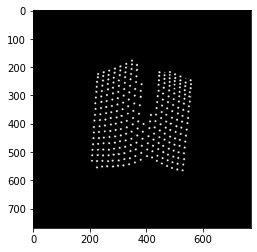

In [9]:
plt.imshow(results['laser_maps'][image], cmap='gray')

## 2) Peakfinding

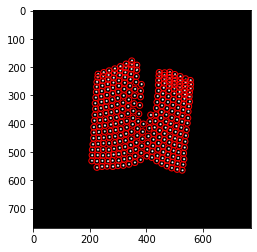

In [10]:
plt.imshow(results['laser_maps'][image], cmap='gray')
peaks = json.loads(results['laser_peaks'][image])
for key, value in peaks.items():
    plt.scatter(value[0], value[1], facecolors='none', edgecolors='r')

## 3) Laser Displacement

x-displacement

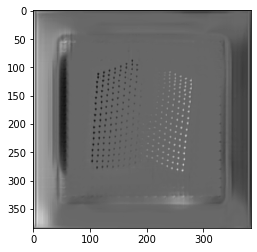

In [11]:
plt.imshow(results['laser_displacement'][image][:,:,0], cmap='gray')

y-displacement

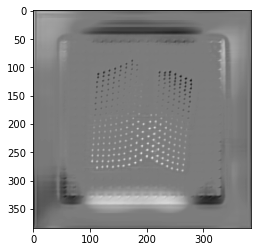

In [12]:
plt.imshow(results['laser_displacement'][image][:,:,1], cmap='gray')

## 4) Laser Deformation

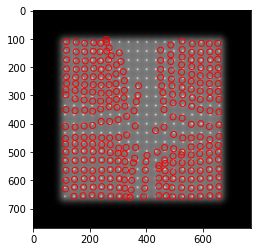

In [13]:
fixed = imageio.imread(fixed_image)

plt.imshow(fixed)

peaks = json.loads(results['laser_deformation'][image])
for key, value in peaks.items():
    plt.scatter(value[0]*2, value[1]*2, facecolors='none', edgecolors='r')

## 5) Nearest Neighbor

In [14]:
laser_nearest = json.loads(results['laser_nearest'][image])

In [15]:
print(laser_nearest)

{'0': '49', '1': '3', '2': '16', '3': '136', '4': '184', '5': '40', '171': '103', '7': '141', '8': '281', '9': '236', '10': '6', '11': '274', '12': '188', '13': '19', '14': '200', '15': '90', '16': '217', '17': '294', '18': '4', '19': '38', '20': '302', '21': '246', '22': '299', '23': '179', '24': '5', '25': '228', '26': '125', '276': '84', '28': '238', '29': '147', '30': '276', '31': '149', '32': '95', '33': '57', '284': '110', '81': '61', '36': '213', '37': '10', '38': '36', '39': '63', '40': '91', '41': '304', '42': '263', '43': '76', '48': '112', '45': '109', '46': '210', '47': '215', '49': '122', '50': '52', '51': '309', '52': '34', '53': '290', '200': '108', '55': '97', '56': '64', '57': '1', '58': '288', '59': '219', '60': '222', '61': '310', '62': '2', '63': '37', '64': '307', '65': '9', '66': '87', '67': '214', '68': '53', '69': '160', '70': '72', '71': '303', '72': '287', '73': '270', '74': '148', '75': '202', '76': '65', '77': '159', '78': '143', '79': '41', '80': '85', '82'

# 6) Sorting

In [16]:
laser_sorted = json.loads(results['laser_sorted'][image])

In [17]:
print(laser_sorted)

{'0': '49', '1': '3', '2': '16', '3': '136', '4': '166', '5': '40', '171': '103', '7': '141', '8': '281', '9': '236', '10': '6', '11': '274', '12': '188', '13': '19', '14': '182', '15': '90', '16': '199', '17': '294', '18': '4', '19': '38', '20': '302', '21': '245', '22': '299', '23': '179', '24': '5', '25': '228', '26': '125', '276': '84', '28': '238', '29': '147', '30': '277', '31': '149', '32': '95', '33': '57', '284': '110', '81': '61', '36': '195', '37': '10', '38': '36', '39': '63', '40': '91', '41': '304', '42': '262', '43': '76', '48': '112', '45': '109', '46': '210', '47': '197', '49': '140', '50': '52', '51': '309', '52': '34', '53': '290', '200': '108', '55': '115', '56': '64', '57': '1', '58': '288', '59': '219', '60': '222', '61': '310', '62': '2', '63': '37', '64': '307', '65': '9', '66': '87', '67': '196', '68': '53', '69': '160', '70': '72', '71': '303', '72': '287', '73': '270', '74': '148', '75': '202', '76': '65', '77': '159', '78': '143', '79': '41', '80': '85', '82

## 7) Retrieve class and x-,y-coordinate of keypoint

In [18]:
index = "0" # just an example

In [19]:
print("x-coordinate: {}".format(peaks[index][0]))
print("y-coordinate: {}".format(peaks[index][1]))
print("class label: {}".format(laser_sorted[index]))

x-coordinate: 263
y-coordinate: 298
class label: 49
